# Convolutional Neural Networks (CNNs):-
  Task: Build an image classifier using the MNIST dataset

In [1]:
# Step 1: Install Libraries (Colab default: already available)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Step 2: Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


# Load MNIST Dataset

In [3]:
# Download and transform dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 55.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.60MB/s]


#Build the CNN Model

In [9]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))      # this is Conv Layer 1
        x = F.relu(self.conv2(x))      #this is Conv Layer 2
        x = self.pool(x)               # Max Pooling
        x = self.dropout(x)            # Dropout
        x = x.view(-1, 9216)           # Flatten
        x = F.relu(self.fc1(x))        # FC1
        x = self.fc2(x)                # this one Output Layer
        return x

model = CNNModel().to(device)

# Define Optimizer and Loss Function

In [8]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

#Train the CNN

In [6]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}]  Loss: {loss.item():.4f}")

for epoch in range(1, 6):  # 5 epochs
    train(model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000]  Loss: 2.3033
Train Epoch: 1 [6400/60000]  Loss: 0.1960
Train Epoch: 1 [12800/60000]  Loss: 0.1657
Train Epoch: 1 [19200/60000]  Loss: 0.1294
Train Epoch: 1 [25600/60000]  Loss: 0.1436
Train Epoch: 1 [32000/60000]  Loss: 0.0129
Train Epoch: 1 [38400/60000]  Loss: 0.0490
Train Epoch: 1 [44800/60000]  Loss: 0.1759
Train Epoch: 1 [51200/60000]  Loss: 0.1593
Train Epoch: 1 [57600/60000]  Loss: 0.0052
Train Epoch: 2 [0/60000]  Loss: 0.2107
Train Epoch: 2 [6400/60000]  Loss: 0.1146
Train Epoch: 2 [12800/60000]  Loss: 0.0567
Train Epoch: 2 [19200/60000]  Loss: 0.0395
Train Epoch: 2 [25600/60000]  Loss: 0.1484
Train Epoch: 2 [32000/60000]  Loss: 0.0207
Train Epoch: 2 [38400/60000]  Loss: 0.0832
Train Epoch: 2 [44800/60000]  Loss: 0.0342
Train Epoch: 2 [51200/60000]  Loss: 0.0455
Train Epoch: 2 [57600/60000]  Loss: 0.1229
Train Epoch: 3 [0/60000]  Loss: 0.0236
Train Epoch: 3 [6400/60000]  Loss: 0.0125
Train Epoch: 3 [12800/60000]  Loss: 0.0207
Train Epoch: 3 [19200/6000

#Evaluate the Model

In [7]:
def test(model, device, test_loader):
    model.eval()
    correct = 0
    test_loss = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()

    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)")

test(model, device, test_loader)


Test set: Average loss: 0.0441, Accuracy: 9873/10000 (98.73%)


 # Visualize Some Predictions

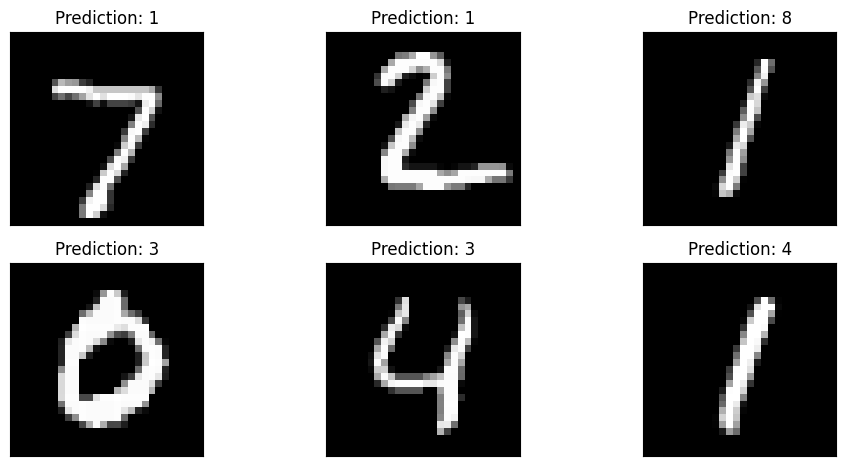

In [10]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data.to(device))

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title(f"Prediction: {output.argmax(1)[i].item()}")
    plt.xticks([])
    plt.yticks([])
plt.show()

--------------------------------------------------------------------------------
# ASSIGNMENT COMPLETED
--------------------------------------------------------------------------------